In [1]:
from glob import glob
import yaml
import os
from IPython.display import Image
import matplotlib.image as img
import matplotlib.pyplot as plt

In [2]:
img_list = glob('/home/ubuntu/dataset/images/*.jpg')
print(len(img_list))

364


In [3]:
from sklearn.model_selection import train_test_split
train_img_list, val_img_list = train_test_split(img_list, test_size=0.3, random_state=0)

print(len(train_img_list), len(val_img_list))

254 110


In [4]:
with open('/home/ubuntu/dataset/train.txt', 'w') as f:
    f.write('\n'.join(train_img_list) + '\n')
    
with open('/home/ubuntu/dataset/val.txt', 'w') as f:
    f.write('\n'.join(val_img_list) + '\n')

with open('/home/ubuntu/dataset/data.yaml', 'r', encoding='utf-8') as f:
    data = yaml.load(f, Loader=yaml.FullLoader)

data['train'] = '/home/ubuntu/dataset/train.txt'
data['val'] = '/home/ubuntu/dataset/val.txt'
data['nc'] = 1 # how many types?
data['names'] = ['knife'] # 0 : knife 1 : spray ...
# data['names'] = ['knife', 'spray', 'portable_charger', 'lighter', 'e_cigarette']

with open('/home/ubuntu/dataset/data.yaml', 'w') as f:
    yaml.dump(data, f)

print(data)

{'download': 'https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip', 'names': ['knife'], 'nc': 1, 'path': '../datasets/coco128', 'test': None, 'train': '/home/ubuntu/dataset/train.txt', 'val': '/home/ubuntu/dataset/val.txt'}


In [5]:
%pwd

'/home/ubuntu/workspace'

In [6]:
%cd ..

/home/ubuntu


In [7]:
%cd yolov5

/home/ubuntu/yolov5


### yolov5s test model

In [8]:
%%time
!python train.py --img 608 --batch 20 --epochs 4000 --data /home/ubuntu/dataset/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name prohibited_items_on_board_s

train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/home/ubuntu/dataset/data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=4000, batch_size=20, imgsz=608, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=prohibited_items_on_board_s, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-55-g0155548 torch 1.10.0+cu102 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, h

### yolov5s test model의 전이학습 test (patience를 200으로 늘림)
여기선 best.pt를 불러와서 전이학습을 했지만, last.pt로 할 수도 있음. 어느 weight를 가지고 전이학습할지 정해서 하면 됨

In [9]:
%%time
!python train.py --img 608 --batch 20 --epochs 4000 --patience 200 --data /home/ubuntu/dataset/data.yaml --cfg ./models/yolov5s.yaml --weights /home/ubuntu/yolov5/runs/train/prohibited_items_on_board_s/weights/best.pt --name prohibited_items_on_board_s

train: weights=/home/ubuntu/yolov5/runs/train/prohibited_items_on_board_s/weights/best.pt, cfg=./models/yolov5s.yaml, data=/home/ubuntu/dataset/data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=4000, batch_size=20, imgsz=608, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=prohibited_items_on_board_s, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=200, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-55-g0155548 torch 1.10.0+cu102 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, o

### yolov5m

In [11]:
%%time
!python train.py --img 608 --batch 20 --epochs 4000 --data /home/ubuntu/dataset/data.yaml --cfg ./models/yolov5m.yaml --weights yolov5m.pt --name prohibited_items_on_board_m

wandb: Currently logged in as: pepze21 (use `wandb login --relogin` to force relogin)
train: weights=yolov5m.pt, cfg=./models/yolov5m.yaml, data=/home/ubuntu/dataset/data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=4000, batch_size=16, imgsz=512, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=prohibited_items_on_board_m, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 7 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.0-35-ga4fece8 torch 1.10.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3

In [ ]:
# early stopping 정도를 조절하고 싶으면(
# 더오래 학습시키고싶다면(혹은 더 짧게 학습시키고싶다면)
# 바꿔말해 epoch를 더 길게 가져가고 싶다면(혹은 더 짧게)
# --patience 300 ~ 0 주면 됨(default는 100)

### Detect (Inference)
.jpg 파일의 detect 결과는 home/ubuntu/yolov5/runs/detect/exp 폴더에 .jpg 형태로 저장됨

In [10]:
val_img_path = val_img_list[0] # 혹은 내가 detect 해보고 싶은 이미지 파일의 path
!python detect.py --weights /home/ubuntu/yolov5/runs/train/prohibited_items_on_board_s2/weights/best.pt --img 608 --conf 0.5 --source "{val_img_path}"

detect: weights=['/home/ubuntu/yolov5/runs/train/prohibited_items_on_board_s2/weights/best.pt'], source=/home/ubuntu/dataset/images/230.jpg, imgsz=[608, 608], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-55-g0155548 torch 1.10.0+cu102 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /home/ubuntu/dataset/images/230.jpg: 608x480 7 knifes, Done. (0.012s)
Speed: 0.5ms pre-process, 12.0ms inference, 1.3ms NMS per image at shape (1, 3, 608, 608)
Results saved to runs/detect/exp


In [13]:
val_img_path = val_img_list[1] # 혹은 내가 detect 해보고 싶은 이미지 파일의 path
!python detect.py --weights /home/ubuntu/yolov5/runs/train/prohibited_items_on_board_s2/weights/best.pt --img 608 --conf 0.5 --source "{val_img_path}"

detect: weights=['/home/ubuntu/yolov5/runs/train/prohibited_items_on_board_s2/weights/best.pt'], source=/home/ubuntu/dataset/images/344.jpg, imgsz=[608, 608], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-55-g0155548 torch 1.10.0+cu102 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /home/ubuntu/dataset/images/344.jpg: 416x608 Done. (0.012s)
Speed: 0.5ms pre-process, 12.0ms inference, 0.3ms NMS per image at shape (1, 3, 608, 608)
Results saved to runs/detect/exp2


In [14]:
val_img_path = val_img_list[2] # 혹은 내가 detect 해보고 싶은 이미지 파일의 path
!python detect.py --weights /home/ubuntu/yolov5/runs/train/prohibited_items_on_board_s2/weights/best.pt --img 608 --conf 0.5 --source "{val_img_path}"

detect: weights=['/home/ubuntu/yolov5/runs/train/prohibited_items_on_board_s2/weights/best.pt'], source=/home/ubuntu/dataset/images/118.jpg, imgsz=[608, 608], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-55-g0155548 torch 1.10.0+cu102 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /home/ubuntu/dataset/images/118.jpg: 576x608 1 knife, Done. (0.015s)
Speed: 0.5ms pre-process, 14.5ms inference, 1.3ms NMS per image at shape (1, 3, 608, 608)
Results saved to runs/detect/exp3


In [15]:
val_img_path = val_img_list[3] # 혹은 내가 detect 해보고 싶은 이미지 파일의 path
!python detect.py --weights /home/ubuntu/yolov5/runs/train/prohibited_items_on_board_s2/weights/best.pt --img 608 --conf 0.5 --source "{val_img_path}"


detect: weights=['/home/ubuntu/yolov5/runs/train/prohibited_items_on_board_s2/weights/best.pt'], source=/home/ubuntu/dataset/images/136.jpg, imgsz=[608, 608], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-55-g0155548 torch 1.10.0+cu102 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /home/ubuntu/dataset/images/136.jpg: 320x608 10 knifes, Done. (0.010s)
Speed: 0.4ms pre-process, 10.2ms inference, 1.3ms NMS per image at shape (1, 3, 608, 608)
Results saved to runs/detect/exp4


In [16]:
val_img_path = val_img_list[4] # 혹은 내가 detect 해보고 싶은 이미지 파일의 path
!python detect.py --weights /home/ubuntu/yolov5/runs/train/prohibited_items_on_board_s2/weights/best.pt --img 608 --conf 0.5 --source "{val_img_path}"


detect: weights=['/home/ubuntu/yolov5/runs/train/prohibited_items_on_board_s2/weights/best.pt'], source=/home/ubuntu/dataset/images/70.jpg, imgsz=[608, 608], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-55-g0155548 torch 1.10.0+cu102 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /home/ubuntu/dataset/images/70.jpg: 608x512 1 knife, Done. (0.012s)
Speed: 0.5ms pre-process, 12.1ms inference, 1.5ms NMS per image at shape (1, 3, 608, 608)
Results saved to runs/detect/exp5


In [17]:
val_img_path = val_img_list[5] # 혹은 내가 detect 해보고 싶은 이미지 파일의 path
!python detect.py --weights /home/ubuntu/yolov5/runs/train/prohibited_items_on_board_s2/weights/best.pt --img 608 --conf 0.5 --source "{val_img_path}"


detect: weights=['/home/ubuntu/yolov5/runs/train/prohibited_items_on_board_s2/weights/best.pt'], source=/home/ubuntu/dataset/images/296.jpg, imgsz=[608, 608], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-55-g0155548 torch 1.10.0+cu102 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /home/ubuntu/dataset/images/296.jpg: 608x608 1 knife, Done. (0.014s)
Speed: 0.5ms pre-process, 13.7ms inference, 1.7ms NMS per image at shape (1, 3, 608, 608)
Results saved to runs/detect/exp6


In [18]:
val_img_path = val_img_list[6] # 혹은 내가 detect 해보고 싶은 이미지 파일의 path
!python detect.py --weights /home/ubuntu/yolov5/runs/train/prohibited_items_on_board_s2/weights/best.pt --img 608 --conf 0.5 --source "{val_img_path}"


detect: weights=['/home/ubuntu/yolov5/runs/train/prohibited_items_on_board_s2/weights/best.pt'], source=/home/ubuntu/dataset/images/204.jpg, imgsz=[608, 608], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-55-g0155548 torch 1.10.0+cu102 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /home/ubuntu/dataset/images/204.jpg: 384x608 3 knifes, Done. (0.011s)
Speed: 0.4ms pre-process, 11.0ms inference, 1.3ms NMS per image at shape (1, 3, 608, 608)
Results saved to runs/detect/exp7


In [19]:
val_img_path = val_img_list[7] # 혹은 내가 detect 해보고 싶은 이미지 파일의 path
!python detect.py --weights /home/ubuntu/yolov5/runs/train/prohibited_items_on_board_s2/weights/best.pt --img 608 --conf 0.5 --source "{val_img_path}"


detect: weights=['/home/ubuntu/yolov5/runs/train/prohibited_items_on_board_s2/weights/best.pt'], source=/home/ubuntu/dataset/images/380.jpg, imgsz=[608, 608], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-55-g0155548 torch 1.10.0+cu102 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /home/ubuntu/dataset/images/380.jpg: 416x608 1 knife, Done. (0.012s)
Speed: 0.5ms pre-process, 11.9ms inference, 1.5ms NMS per image at shape (1, 3, 608, 608)
Results saved to runs/detect/exp8


In [20]:
val_img_path = val_img_list[8] # 혹은 내가 detect 해보고 싶은 이미지 파일의 path
!python detect.py --weights /home/ubuntu/yolov5/runs/train/prohibited_items_on_board_s2/weights/best.pt --img 608 --conf 0.5 --source "{val_img_path}"


detect: weights=['/home/ubuntu/yolov5/runs/train/prohibited_items_on_board_s2/weights/best.pt'], source=/home/ubuntu/dataset/images/311.jpg, imgsz=[608, 608], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-55-g0155548 torch 1.10.0+cu102 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /home/ubuntu/dataset/images/311.jpg: 608x608 1 knife, Done. (0.014s)
Speed: 0.5ms pre-process, 13.7ms inference, 1.3ms NMS per image at shape (1, 3, 608, 608)
Results saved to runs/detect/exp9


In [21]:
val_img_path = val_img_list[9] # 혹은 내가 detect 해보고 싶은 이미지 파일의 path
!python detect.py --weights /home/ubuntu/yolov5/runs/train/prohibited_items_on_board_s2/weights/best.pt --img 608 --conf 0.5 --source "{val_img_path}"


detect: weights=['/home/ubuntu/yolov5/runs/train/prohibited_items_on_board_s2/weights/best.pt'], source=/home/ubuntu/dataset/images/198.jpg, imgsz=[608, 608], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-55-g0155548 torch 1.10.0+cu102 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /home/ubuntu/dataset/images/198.jpg: 320x608 1 knife, Done. (0.010s)
Speed: 0.4ms pre-process, 10.5ms inference, 1.5ms NMS per image at shape (1, 3, 608, 608)
Results saved to runs/detect/exp10


In [22]:
val_img_path = val_img_list[10] # 혹은 내가 detect 해보고 싶은 이미지 파일의 path
!python detect.py --weights /home/ubuntu/yolov5/runs/train/prohibited_items_on_board_s2/weights/best.pt --img 608 --conf 0.5 --source "{val_img_path}"


detect: weights=['/home/ubuntu/yolov5/runs/train/prohibited_items_on_board_s2/weights/best.pt'], source=/home/ubuntu/dataset/images/64.jpg, imgsz=[608, 608], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-55-g0155548 torch 1.10.0+cu102 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /home/ubuntu/dataset/images/64.jpg: 448x608 3 knifes, Done. (0.012s)
Speed: 0.5ms pre-process, 11.8ms inference, 1.3ms NMS per image at shape (1, 3, 608, 608)
Results saved to runs/detect/exp11


### jupyter notebook으로 AWS에 있는 이미지 파일 열어보기

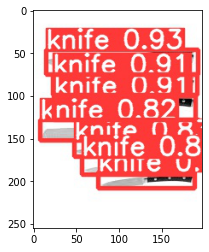

In [11]:
# matplotlib 라이브러리 사용
plt.imshow(img.imread('/home/ubuntu/yolov5/runs/detect/exp/230.jpg'))
plt.show()

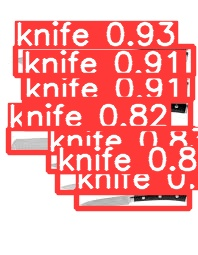

In [12]:
# IPython 라이브러리 사용
Image('/home/ubuntu/yolov5/runs/detect/exp/230.jpg')

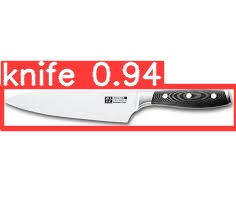

In [25]:
Image('/home/ubuntu/workspace/118.jpg')

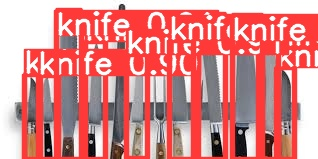

In [26]:
Image('/home/ubuntu/workspace/136.jpg')

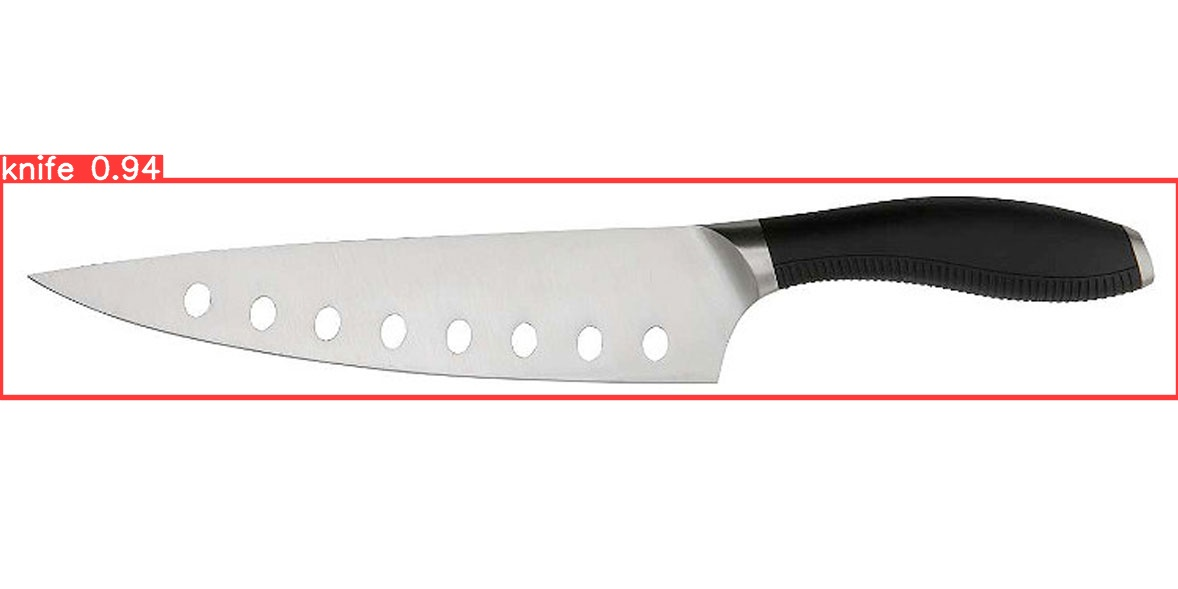

In [27]:
Image('/home/ubuntu/workspace/198.jpg')

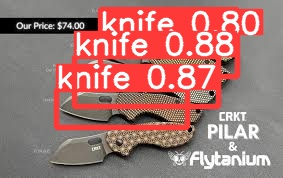

In [28]:
Image('/home/ubuntu/workspace/204.jpg')

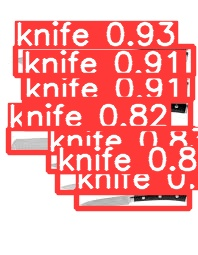

In [29]:
Image('/home/ubuntu/workspace/230.jpg')

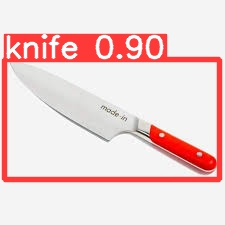

In [30]:
Image('/home/ubuntu/workspace/296.jpg')

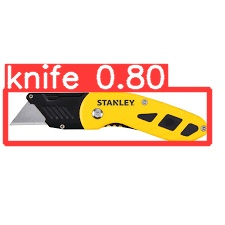

In [31]:
Image('/home/ubuntu/workspace/311.jpg')

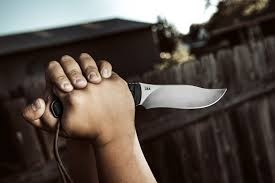

In [32]:
Image('/home/ubuntu/workspace/344.jpg')

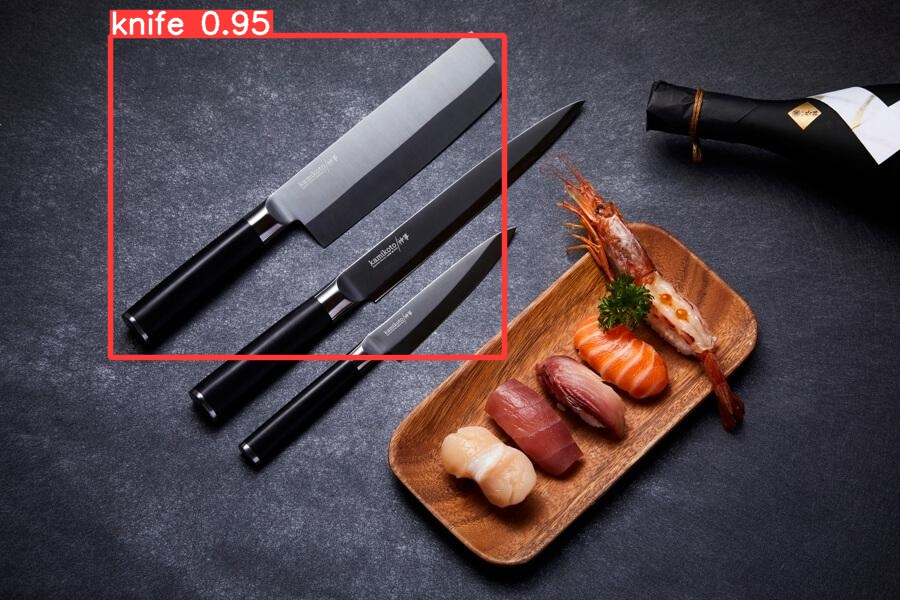

In [33]:
Image('/home/ubuntu/workspace/380.jpg')

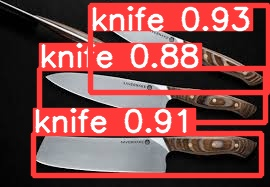

In [34]:
Image('/home/ubuntu/workspace/64.jpg')

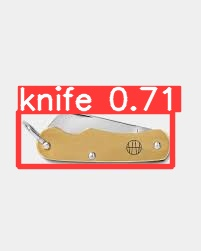

In [35]:
Image('/home/ubuntu/workspace/70.jpg')

In [ ]:
# yolov5로부터 수집할 결과물(output)
# 1. 탐지된 물건 종류들 ex) knife, spray...
# 2. ...



# <Django>
# 금지목록 리스트 = ['knife', 'spray', ...] 랑 비교해서
# 금지여부를 이쁘게 가공해서 출력



# 이용자의 검색 로그 활용 -> 이용자 패턴 분석

# 국가별 소지품 빈도

# 로그를 최대한 광범위하게 다 수집